In [64]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
sim = AerSimulator()

In [59]:
def make_bv_oracle_gate(a_bits: str):
    n = len(a_bits)
    oc = QuantumCircuit(n+1, name="U_f(a)")

    for i, bit in enumerate(reversed(a_bits)):
        if bit == '1':
            oc.cx(i, n)
    display(oc.draw('mpl'))
    return oc.to_gate(label=f"U_f[{a_bits}]")

In [60]:
def build_bv_circuit(a_bits: str):
    n = len(a_bits)
    
    qx = QuantumRegister(n, 'x')
    qa = QuantumRegister(1, "anc")
    cr = ClassicalRegister(n, "c")

    qc = QuantumCircuit(qx, qa, cr)

    qc.x(qa[0])
    qc.h(qa[0])

    qc.h(qx)

    oracle_gate = make_bv_oracle_gate(a_bits)

    qc.append(oracle_gate, qargs=[*qx, qa[0]])

    qc.h(qx)

    qc.measure(qx, cr)
    return qc

In [61]:
def run_bv(a_bits: str, shots: int = 1024):
    qc = build_bv_circuit(a_bits)
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()

    print("Counts:", counts)
    display(qc.draw('mpl'))

    recovered = max(counts, key=counts.get)
    print(f"Recovered a: {recovered} (expected: {a_bits})")
    return counts

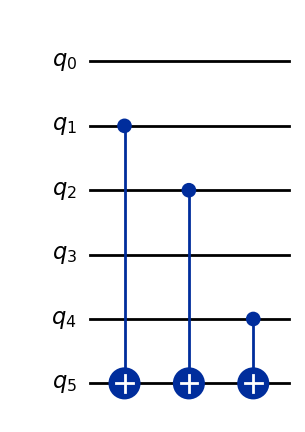

Counts: {'10110': 1024}


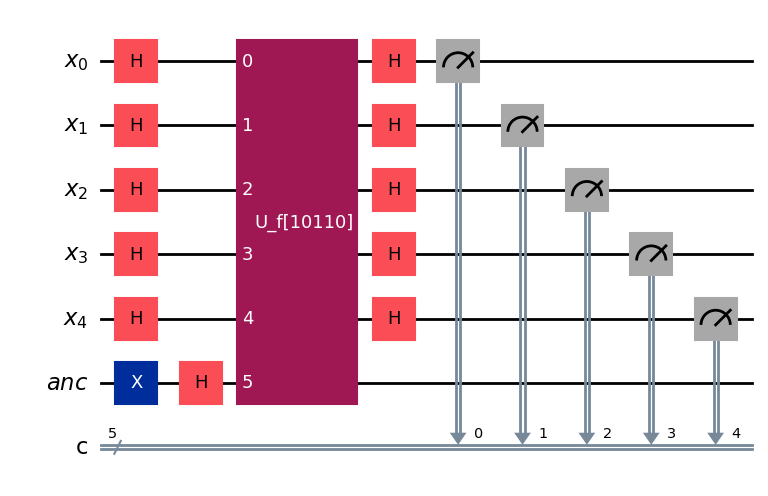

Recovered a: 10110 (expected: 10110)
Counts:    {'10110': 1024}


In [62]:
a = "10110"
print("Counts:   ", run_bv(a, shots=1024))